<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,70.332398,59.630341,77.209663,55.934564,0.008414,273.115379,273.111775,0.003605
1,0.0,1.0,23.234532,40.245278,38.405042,29.450090,-0.005148,141.329794,141.338463,-0.008670
2,0.0,2.0,47.822352,54.920242,36.796707,60.486452,0.009508,210.035261,210.024540,0.010721
3,0.0,3.0,70.224558,20.065414,34.079241,68.132936,0.002515,202.504664,202.506727,-0.002063
4,0.0,4.0,81.905989,50.411082,31.369930,30.536961,-0.029289,204.194673,204.226293,-0.031620
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,36.661623,58.817069,72.103779,85.528881,0.000502,263.111853,263.114188,-0.002335
29996,999.0,26.0,85.282281,88.935020,50.504489,22.899564,-0.003033,257.618321,257.617678,0.000643
29997,999.0,27.0,61.814003,81.549652,70.727643,89.277363,-0.012224,313.356437,313.364673,-0.008236
29998,999.0,28.0,87.430372,42.599818,86.047797,45.910920,-0.009661,271.979246,271.986989,-0.007743


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    70.332398  59.630341  77.209663  55.934564  0.008414  273.115379   
      1.0    23.234532  40.245278  38.405042  29.450090 -0.005148  141.329794   
      2.0    47.822352  54.920242  36.796707  60.486452  0.009508  210.035261   
      3.0    70.224558  20.065414  34.079241  68.132936  0.002515  202.504664   
      4.0    81.905989  50.411082  31.369930  30.536961 -0.029289  204.194673   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   36.661623  58.817069  72.103779  85.528881  0.000502  263.111853   
      26.0   85.282281  88.935020  50.504489  22.899564 -0.003033  257.618321   
      27.0   61.814003  81.549652  70.727643  89.277363 -0.012224  313.356437   
      28.0   87.430372  42.599818  86.047797  45.910920 -0.009661  271.979246   
      29.0   27.870653  21.467066  30.817756  60.862402  0.056087  151.073963   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.111775  0.003605  
      1.0    141.338463 -0.008670  
      2.0    210.024540  0.010721  
      3.0    202.506727 -0.002063  
      4.0    204.226293 -0.031620  
...                 ...       ...  
999.0 25.0   263.114188 -0.002335  
      26.0   257.617678  0.000643  
      27.0   313.364673 -0.008236  
      28.0   271.986989 -0.007743  
      29.0   151.032103  0.041860  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    70.332398  59.630341  77.209663  55.934564  0.008414  273.115379   
      1.0    23.234532  40.245278  38.405042  29.450090 -0.005148  141.329794   
      2.0    47.822352  54.920242  36.796707  60.486452  0.009508  210.035261   
      3.0    70.224558  20.065414  34.079241  68.132936  0.002515  202.504664   
      4.0    81.905989  50.411082  31.369930  30.536961 -0.029289  204.194673   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   36.661623  58.817069  72.103779  85.528881  0.000502  263.111853   
      26.0   85.282281  88.935020  50.504489  22.899564 -0.003033  257.618321   
      27.0   61.814003  81.549652  70.727643  89.277363 -0.012224  313.356437   
      28.0   87.430372  42.599818  86.047797  45.910920 -0.009661  271.979246   
      29.0   27.870653  21.467066  30.817756  60.862402  0.056087  151.073963   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.111775  0.003605  
      1.0    141.338463 -0.008670  
      2.0    210.024540  0.010721  
      3.0    202.506727 -0.002063  
      4.0    204.226293 -0.031620  
...                 ...       ...  
999.0 25.0   263.114188 -0.002335  
      26.0   257.617678  0.000643  
      27.0   313.364673 -0.008236  
      28.0   271.986989 -0.007743  
      29.0   151.032103  0.041860  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,70.332398,59.630341,77.209663,55.934564,0.008414,273.115379,273.111775,0.003605
1,0.0,1.0,23.234532,40.245278,38.405042,29.450090,-0.005148,141.329794,141.338463,-0.008670
2,0.0,2.0,47.822352,54.920242,36.796707,60.486452,0.009508,210.035261,210.024540,0.010721
3,0.0,3.0,70.224558,20.065414,34.079241,68.132936,0.002515,202.504664,202.506727,-0.002063
4,0.0,4.0,81.905989,50.411082,31.369930,30.536961,-0.029289,204.194673,204.226293,-0.031620
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,36.661623,58.817069,72.103779,85.528881,0.000502,263.111853,263.114188,-0.002335
29996,999.0,26.0,85.282281,88.935020,50.504489,22.899564,-0.003033,257.618321,257.617678,0.000643
29997,999.0,27.0,61.814003,81.549652,70.727643,89.277363,-0.012224,313.356437,313.364673,-0.008236
29998,999.0,28.0,87.430372,42.599818,86.047797,45.910920,-0.009661,271.979246,271.986989,-0.007743


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    70.332398  59.630341  77.209663  55.934564  0.008414  273.115379   
      1.0    23.234532  40.245278  38.405042  29.450090 -0.005148  141.329794   
      2.0    47.822352  54.920242  36.796707  60.486452  0.009508  210.035261   
      3.0    70.224558  20.065414  34.079241  68.132936  0.002515  202.504664   
      4.0    81.905989  50.411082  31.369930  30.536961 -0.029289  204.194673   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   36.661623  58.817069  72.103779  85.528881  0.000502  263.111853   
      26.0   85.282281  88.935020  50.504489  22.899564 -0.003033  257.618321   
      27.0   61.814003  81.549652  70.727643  89.277363 -0.012224  313.356437   
      28.0   87.430372  42.599818  86.047797  45.910920 -0.009661  271.979246   
      29.0   27.870653  21.467066  30.817756  60.862402  0.056087  151.073963   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.111775  0.003605  
      1.0    141.338463 -0.008670  
      2.0    210.024540  0.010721  
      3.0    202.506727 -0.002063  
      4.0    204.226293 -0.031620  
...                 ...       ...  
999.0 25.0   263.114188 -0.002335  
      26.0   257.617678  0.000643  
      27.0   313.364673 -0.008236  
      28.0   271.986989 -0.007743  
      29.0   151.032103  0.041860  

[30000 rows x 8 columns]

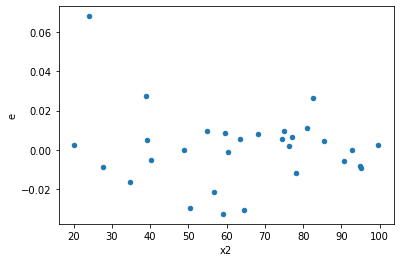

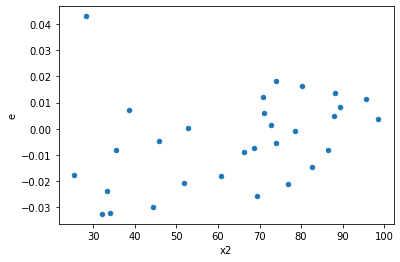

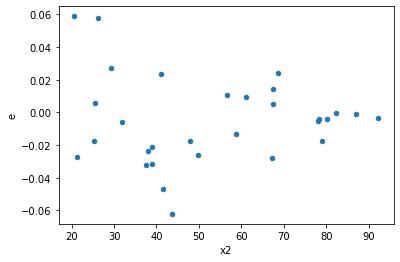

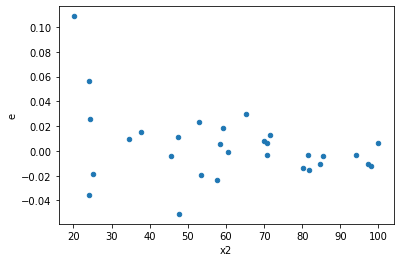

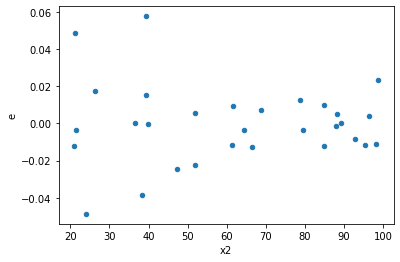

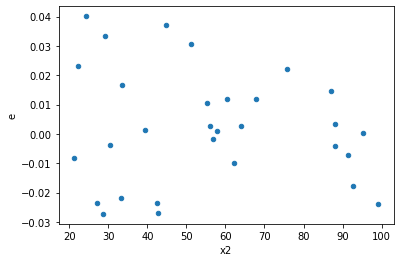

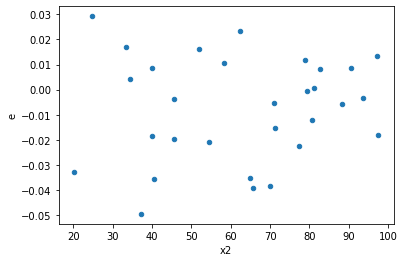

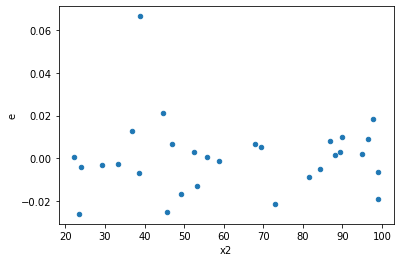

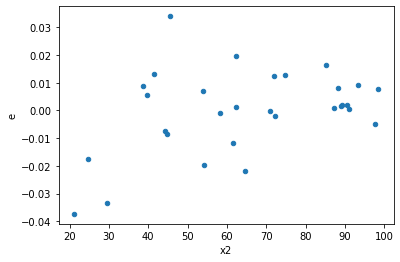

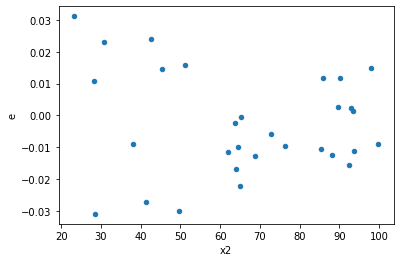

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,15.0,0.0008468306167432531,0.007337293529379253,0.0001209758023918933,0.0004891529019586169,4.043394565584593,0.022129110319508483,0.9889354448402458,0.011064555159754241,Reject001=1 : Homoscedasticity
1.0,9.0,13.0,0.001249993189569703,0.005781913709230933,0.00013888813217441146,0.0004447625930177641,3.2023081170048773,0.056529756350374605,0.9717351218248127,0.028264878175187302,Reject001=1 : Homoscedasticity
2.0,10.0,12.0,0.0031184995676669207,0.013377056441134606,0.0003118499567666921,0.0011147547034278838,3.574650819213928,0.040499006043024366,0.9797504969784878,0.020249503021512183,Reject001=1 : Homoscedasticity
7.0,10.0,12.0,0.0009140871485293828,0.004789232251659998,9.140871485293828e-05,0.0003991026876383332,4.366133888660664,0.018747834615204573,0.9906260826923977,0.009373917307602286,Reject001=1 : Homoscedasticity
10.0,12.0,10.0,0.0013901946898327473,0.0041069674183332435,0.00011584955748606227,0.00041069674183332437,3.5450868414644985,0.05364073035550576,0.9731796348222471,0.02682036517775288,Reject001=1 : Homoscedasticity
13.0,15.0,7.0,0.003167005608350977,0.0031497202799980854,0.00021113370722339846,0.00044996003999972647,2.13116155595008,0.31600925207979436,0.8419953739601028,0.15800462603989718,Reject001=1 : Homoscedasticity
16.0,10.0,12.0,0.0032629659061435526,0.005143485798910681,0.0003262965906143553,0.0004286238165758901,1.313601885232303,0.6454899517974608,0.6772550241012696,0.3227449758987304,Reject001=1 : Homoscedasticity
18.0,11.0,11.0,0.0021565000849267236,0.004244930613331202,0.00019604546226606578,0.00038590278303010926,1.9684351709522152,0.27664609609877666,0.8616769519506117,0.13832304804938833,Reject001=1 : Homoscedasticity
23.0,10.0,12.0,0.0013184673778030228,0.00562472019621366,0.0001318467377803023,0.00046872668301780495,3.5550874516049804,0.04132610252377944,0.9793369487381103,0.02066305126188972,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,15.0,0.0008468306167432531,0.007337293529379253,0.0001209758023918933,0.0004891529019586169,4.043394565584593,0.022129110319508483,Reject001=1 : Homoscedasticity
1.0,9.0,13.0,0.001249993189569703,0.005781913709230933,0.00013888813217441146,0.0004447625930177641,3.2023081170048773,0.056529756350374605,Reject001=1 : Homoscedasticity
2.0,10.0,12.0,0.0031184995676669207,0.013377056441134606,0.0003118499567666921,0.0011147547034278838,3.574650819213928,0.040499006043024366,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,0.016020942320361775,0.001684394004306539,0.0016020942320361775,0.0001403661670255449,0.08761417663126275,0.0005496284276181988,Reject001=0 : Heteroscedasticity
4.0,7.0,15.0,0.00478270972627985,0.0011898141332820002,0.0006832442466114071,7.932094221880002e-05,0.11609456297977952,0.007883803069136615,Reject001=0 : Heteroscedasticity
5.0,9.0,13.0,0.002601778493255538,0.0034635675473983474,0.0002890864992506153,0.00026642827287679595,0.921621291784448,0.926607854188507,Reject001=1 : Homoscedasticity
6.0,7.0,15.0,0.00472920517696568,0.005458410508184221,0.0006756007395665257,0.00036389403387894806,0.5386229063520968,0.4151409787606895,Reject001=1 : Homoscedasticity
7.0,10.0,12.0,0.0009140871485293828,0.004789232251659998,9.140871485293828e-05,0.0003991026876383332,4.366133888660664,0.018747834615204573,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,0.0030765212533798926,0.0010614248466878774,0.00027968375030726296,9.649316788071612e-05,0.34500813070014935,0.0914581868458854,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      814
Reject001=0 : Heteroscedasticity    186
Name: Result_test, dtype: int64